### MapMyRun Data

Import Packages

In [1]:
%pip install pandas
%pip install sklearn
%pip install matplotlib
%pip install seaborn
%pip install numpy
%pip install scipy
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics
# Evaluation metrics related methods
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import norm
from scipy import stats
sns.set()

rs = 123
temp = pd.read_csv('https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv')
headers_dict = {'Workout Date': 'Workout_Date', 'Avg Pace (min/mi)': 'Avg_Pace', 'Distance (mi)':'Distance', 'Avg Speed (mi/h)':'Avg_Speed', 'Avg Heart Rate':'Avg_Heart_Rate', 'Calories Burned (kCal)':'Calories_Burned', 'Workout Time (seconds)': 'Workout_Time', 'Max Pace (min/mi)':'Max_Pace', 'Max Pace':'Max_Pace', 'Date Submitted':'Date_Submitted', 'Activity Type':'Activity_Type', 'Max Speed (mi/h)':'Max_Speed'}
temp.rename(columns = headers_dict, inplace=True)
temp['Workout_Date'] = pd.to_datetime(temp['Workout_Date'])
temp['Date_Submitted'] = pd.to_datetime(temp['Date_Submitted'])
mean_speed = temp['Avg_Heart_Rate'].mean()
#temp['Avg_Heart_Rate'].fillna(value = mean_value, inplace = True)

#step_value = temp['Steps'].mean()
#temp['Steps'].fillna(value = step_value, inplace = True)
temp['day_of_week']=temp['Workout_Date'].dt.day_name()

temp[temp.Avg_Heart_Rate == 0] = np.nan
#temp[temp.Max_Pace == 0] = np.nan

temp.fillna(temp.Avg_Heart_Rate.median(), inplace = True)
#temp.fillna(temp.Max_Pace.median(), inplace = True)
#temp.head()

temp_df = pd.DataFrame(temp)
temp_df.drop(['Notes', 'Source', 'Link', 'Max_Speed', 'Max_Pace'], axis = 1, inplace = True)
temp_df.rename(columns = headers_dict, inplace=True)
upd = temp_df.round(2)
upd2 =upd
upd3 = upd2[upd2['Avg_Pace'].between(6, 13)]
upd4 = upd3[upd3['Avg_Speed'] > 3]
upd4.sort_values(by=['Workout_Date'], ascending=True)
#upd5 = upd4[upd4['Avg_Pace'] < 13]
df = upd4[upd4['Activity_Type'] == 'Run']
df['Calculated'] = df['Workout_Time'] / 60

df['Workout_Date'] = pd.to_datetime(df['Workout_Date'])
df.sort_values(by=['Workout_Date'], ascending=False)

df['day_of_week']=df['Workout_Date'].dt.day_name()

df2 = df[['Workout_Date', 'Calories_Burned',
       'Distance', 'Workout_Time', 'Avg_Pace', 'Avg_Speed',
       'Avg_Heart_Rate', 'Steps',
       'Calculated', 'day_of_week']]

df3 = (df2[['Workout_Date','Calories_Burned','Distance','Workout_Time', 'Avg_Pace', 'Avg_Speed', 'Avg_Heart_Rate', 'Steps', 'Calculated', 'day_of_week']]).rename(columns={"Calculated" : "Minutes"})
df3[['Minutes']] = df3[['Minutes']].round(2)

bins = [0, 20, 30, 50, 100, 150]
labels = ['Short', 'Average', 'Long', 'Really Long', 'Too Long']
df3['Distances'] = pd.cut(df3['Minutes'], bins=bins, labels=labels)
round(df3.describe(),2)
df4 = df3[['Calories_Burned','Distance','Workout_Time', 'Avg_Pace', 'Avg_Speed', 'Avg_Heart_Rate', 'Steps', 'Minutes']]
df4['5k'] = np.where(df4.Distance == 3.10, 1, 0)
df4.head()

,Calories_Burned,Distance,Workout_Time,Avg_Pace,Avg_Speed,Avg_Heart_Rate,Steps,Minutes,5k
0,440.0,3.10,2093.0,11.25,5.33,134.0,3227.0,34.88,1
1,762.0,6.21,3854.0,10.34,5.80,153.0,10072.0,64.23,0
2,769.0,6.26,3884.0,10.33,5.81,147.0,10292.0,64.73,0
3,415.0,3.10,1804.0,9.70,6.19,150.0,4660.0,30.07,1
4,403.0,3.10,1658.0,8.91,6.73,145.0,4439.0,27.63,1


### Sigmoid Function

## KNN

In [3]:
# Set up X and y variables
y, X = df4['5k'], df4.drop(columns='5k')
# Split the data into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [4]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)
print(y_transformed)

[1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1
 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 1
 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1
 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1
 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0
 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 0 0 0 0 0 

In [5]:
!pip install sklearn
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X, y_transformed)

LogisticRegression()

In [6]:
# Estimate KNN model and report outcomes
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       141
           1       0.84      0.82      0.83        65

    accuracy                           0.89       206
   macro avg       0.88      0.87      0.88       206
weighted avg       0.89      0.89      0.89       206

Accuracy score:  0.89
F1 Score:  0.83


Text(0.5, 99.24999999999997, 'Distance')

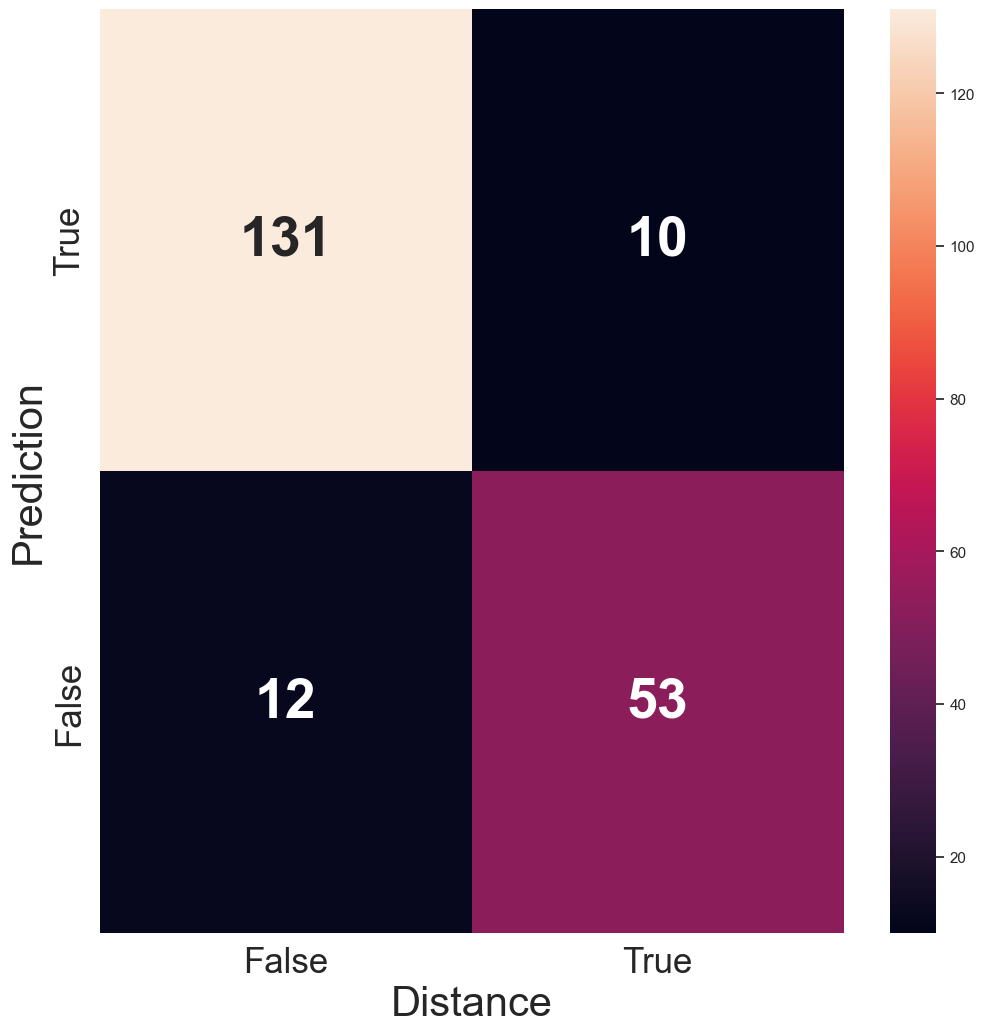

In [7]:
# Plot confusion matrix
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})  
labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Distance', fontsize=30)

### K Value
-To determine the right value for K, examine results for values of K from 1 to 40.

-This time, focus on two measures, the F-1 Score, and the Error Rate (1-Accuracy).

-Generate charts which plot each of these measures as a function of K.

-What do these charts suggest about the optimal value for K?

In [8]:
max_k = 40
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

<Figure size 1920x1440 with 0 Axes>

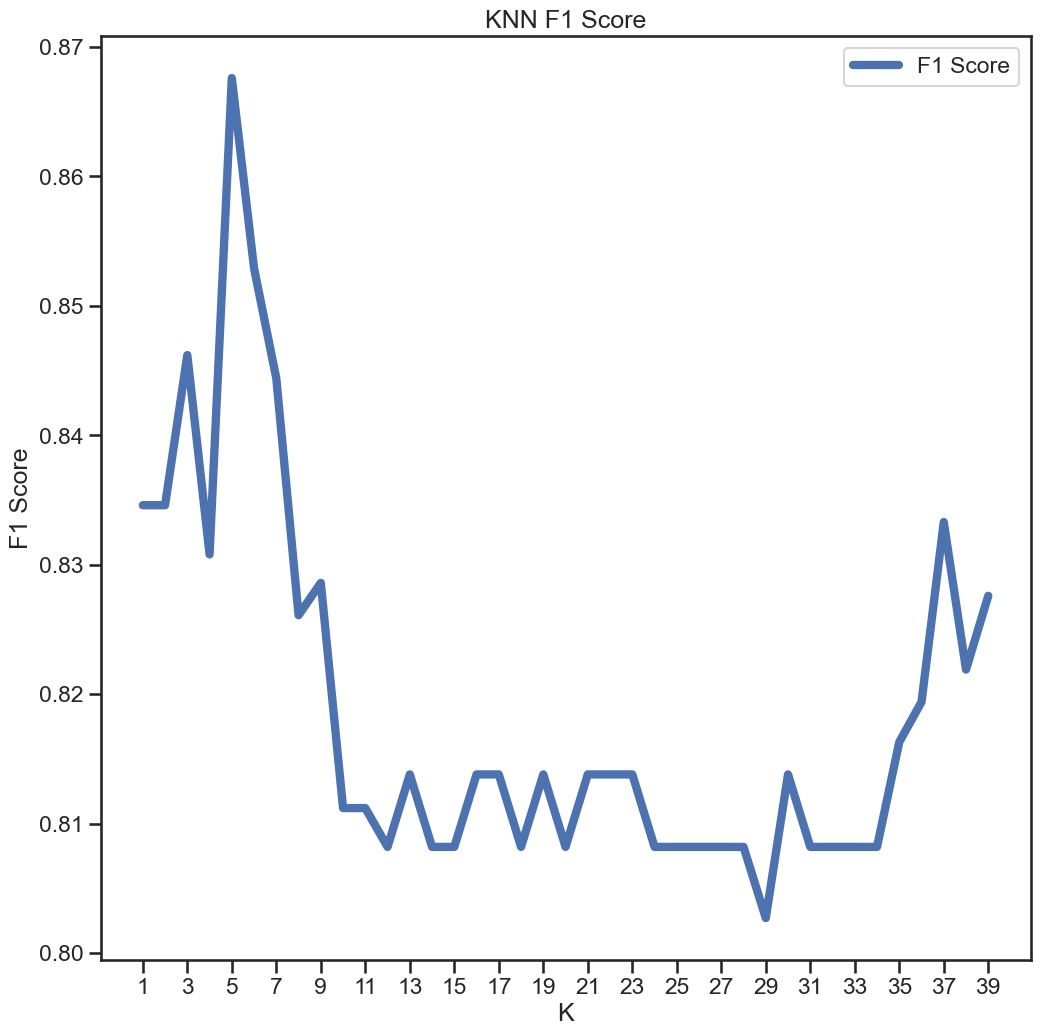

In [9]:
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN F1 Score')
plt.savefig('knn_f1.png')

<Figure size 1920x1440 with 0 Axes>

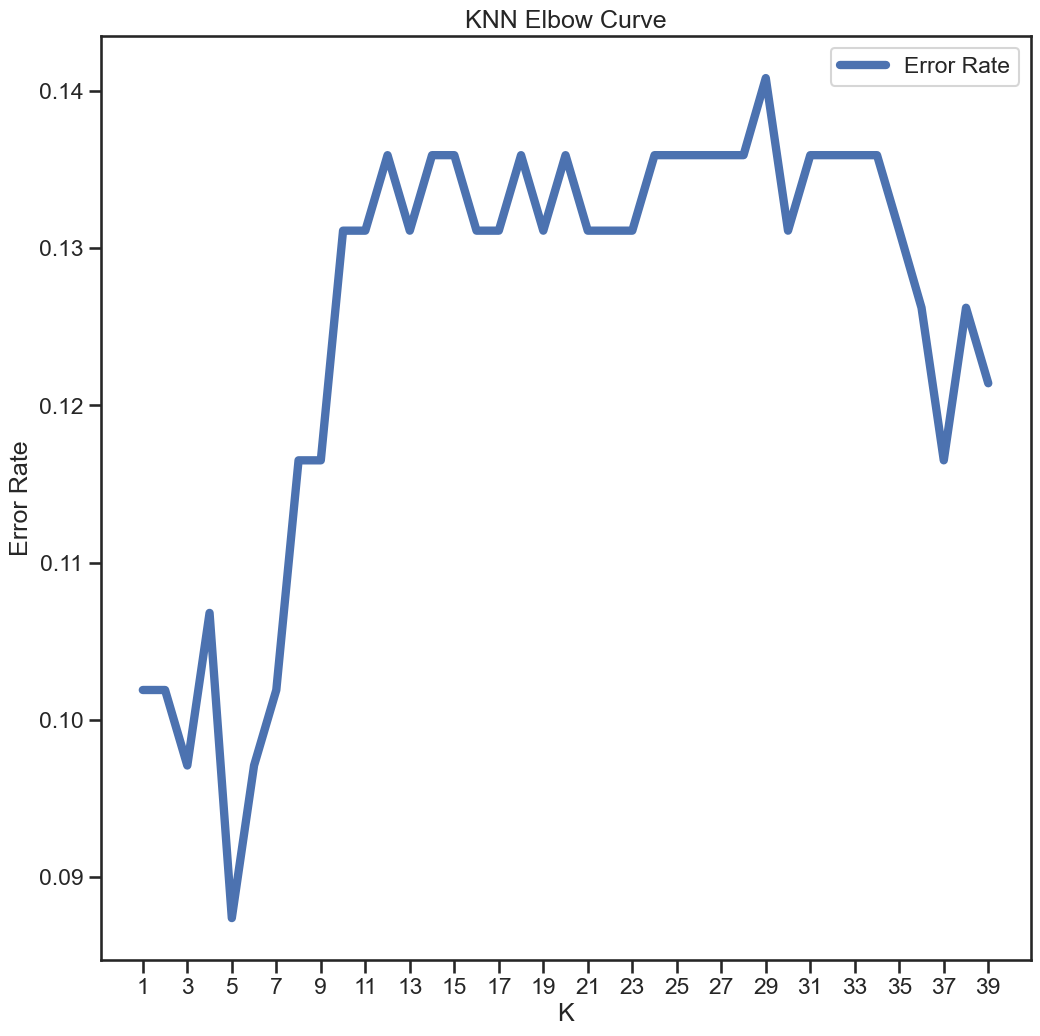

In [10]:
# Plot Accuracy (Error Rate) results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')
plt.savefig('knn_elbow.png')
### END SOLUTION

In [11]:
y.value_counts(normalize=True)

0    0.697856
1    0.302144
Name: 5k, dtype: float64

<AxesSubplot:>

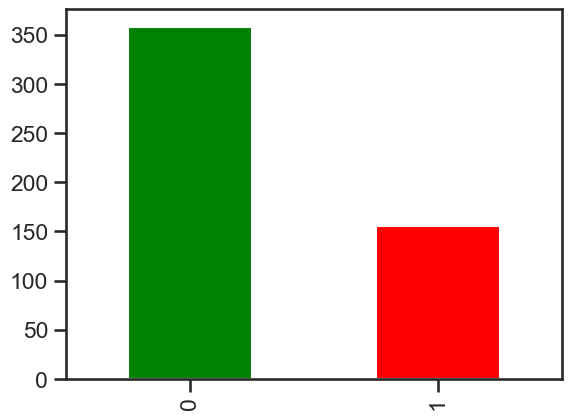

In [12]:
y.value_counts().plot.bar(color=['green', 'red'])

In [13]:
# Split 80% as training dataset
# and 20% as testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = rs)

In [14]:
# Define a KNN classifier with `n_neighbors=2`
knn_model = KNeighborsClassifier(n_neighbors=2)

In [15]:
knn_model.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=2)

In [16]:
preds = knn_model.predict(X_test)

To evaluate the KNN classifier, we provide a pre-defined method to return the commonly used evaluation metrics such as accuracy, recall, precision, f1score, and so on, based on the true classes in the 'y_test' and model predictions.

In [17]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [18]:
evaluate_metrics(y_test, preds)

{'accuracy': 0.8543689320388349,
 'recall': 0.7419354838709677,
 'precision': 0.7666666666666667,
 'f1score': 0.7540983606557377}

We can try different n_neighbors (the K value) and check which K gives the best classification performance.

Then we will train 50 KNN classifiers with K ranged from 1 to 50.


In [19]:
# Try K from 1 to 50
max_k = 50
# Create an empty list to store f1score for each k
f1_scores = []

for k in range(1, max_k + 1):
    # Create a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Train the classifier
    knn = knn.fit(X_train, y_train.values.ravel())
    preds = knn.predict(X_test)
    # Evaluate the classifier with f1score
    f1 = f1_score(preds, y_test)
    f1_scores.append((k, round(f1_score(y_test, preds), 4)))
# Convert the f1score list to a dataframe
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
f1_results.set_index('K')

,F1 Score
K,
1,0.7297
2,0.7541
3,0.7714
4,0.7812
5,0.7576
6,0.7188
7,0.7714
8,0.7077
9,0.7429


Text(0.5, 1.0, 'KNN F1 Score')

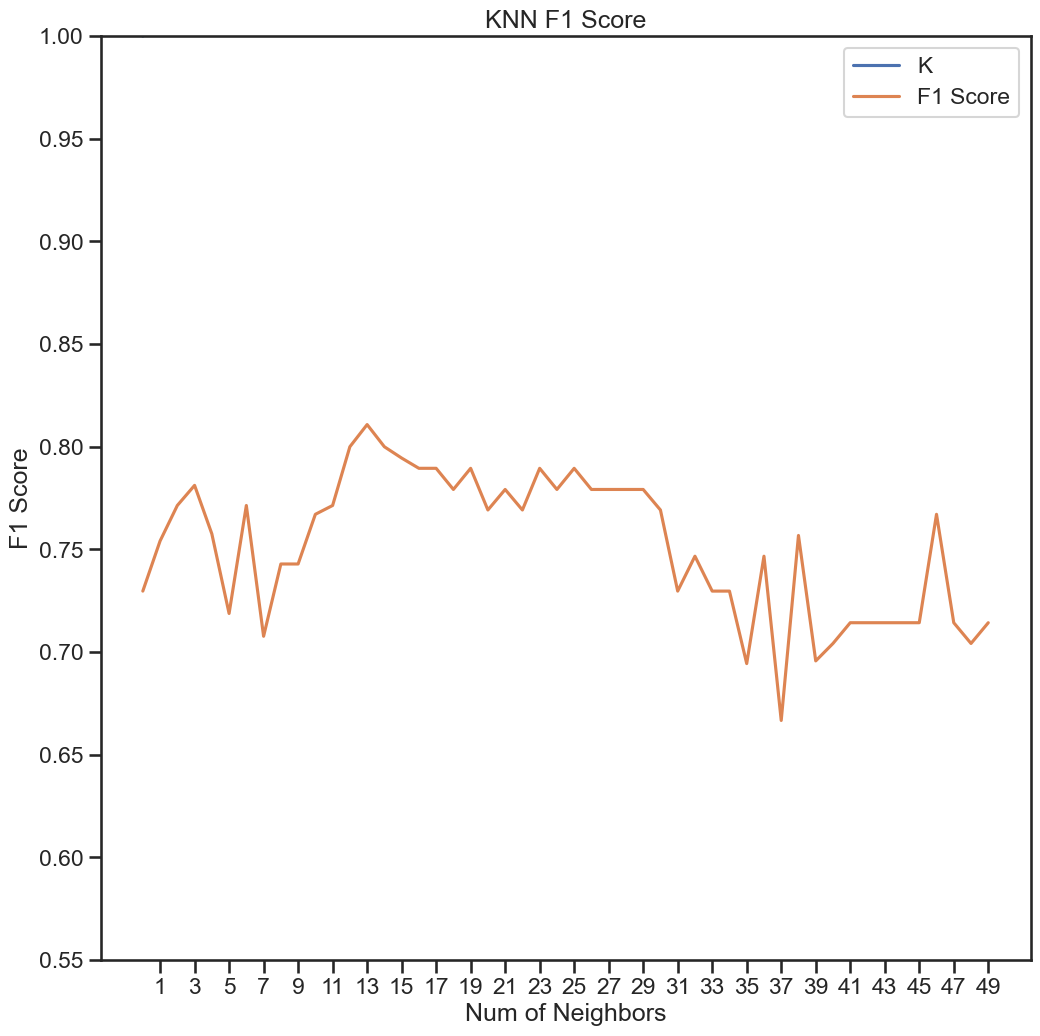

In [20]:
# Plot F1 results
ax = f1_results.plot(figsize=(12, 12))
ax.set(xlabel='Num of Neighbors', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.ylim((0.55, 1))
plt.title('KNN F1 Score')

### SVM

Import the data.

Create the target variable y as a 1/0 column where 1 means red.

Create a pairplot for the dataset.

Create a bar plot showing the correlations between each column and y

Pick the most 2 correlated fields (using the absolute value of correlations) and create X

Use MinMaxScaler to scale X. Note that this will output a np.array. Make it a DataFrame again and rename the columns appropriately.

In [21]:
data = df4
fields = list(data.columns[:-1])  # everything except "color"
correlations = data[fields].corrwith(y)
correlations.sort_values(inplace=True)
correlations

Steps             -0.254519
Minutes           -0.251352
Workout_Time      -0.251343
Distance          -0.234456
Avg_Pace          -0.233951
Calories_Burned   -0.192680
Avg_Heart_Rate     0.074550
Avg_Speed          0.238062
dtype: float64

In [22]:
sns.set_context('talk')
#sns.set_palette(palette)
sns.set_style('white')

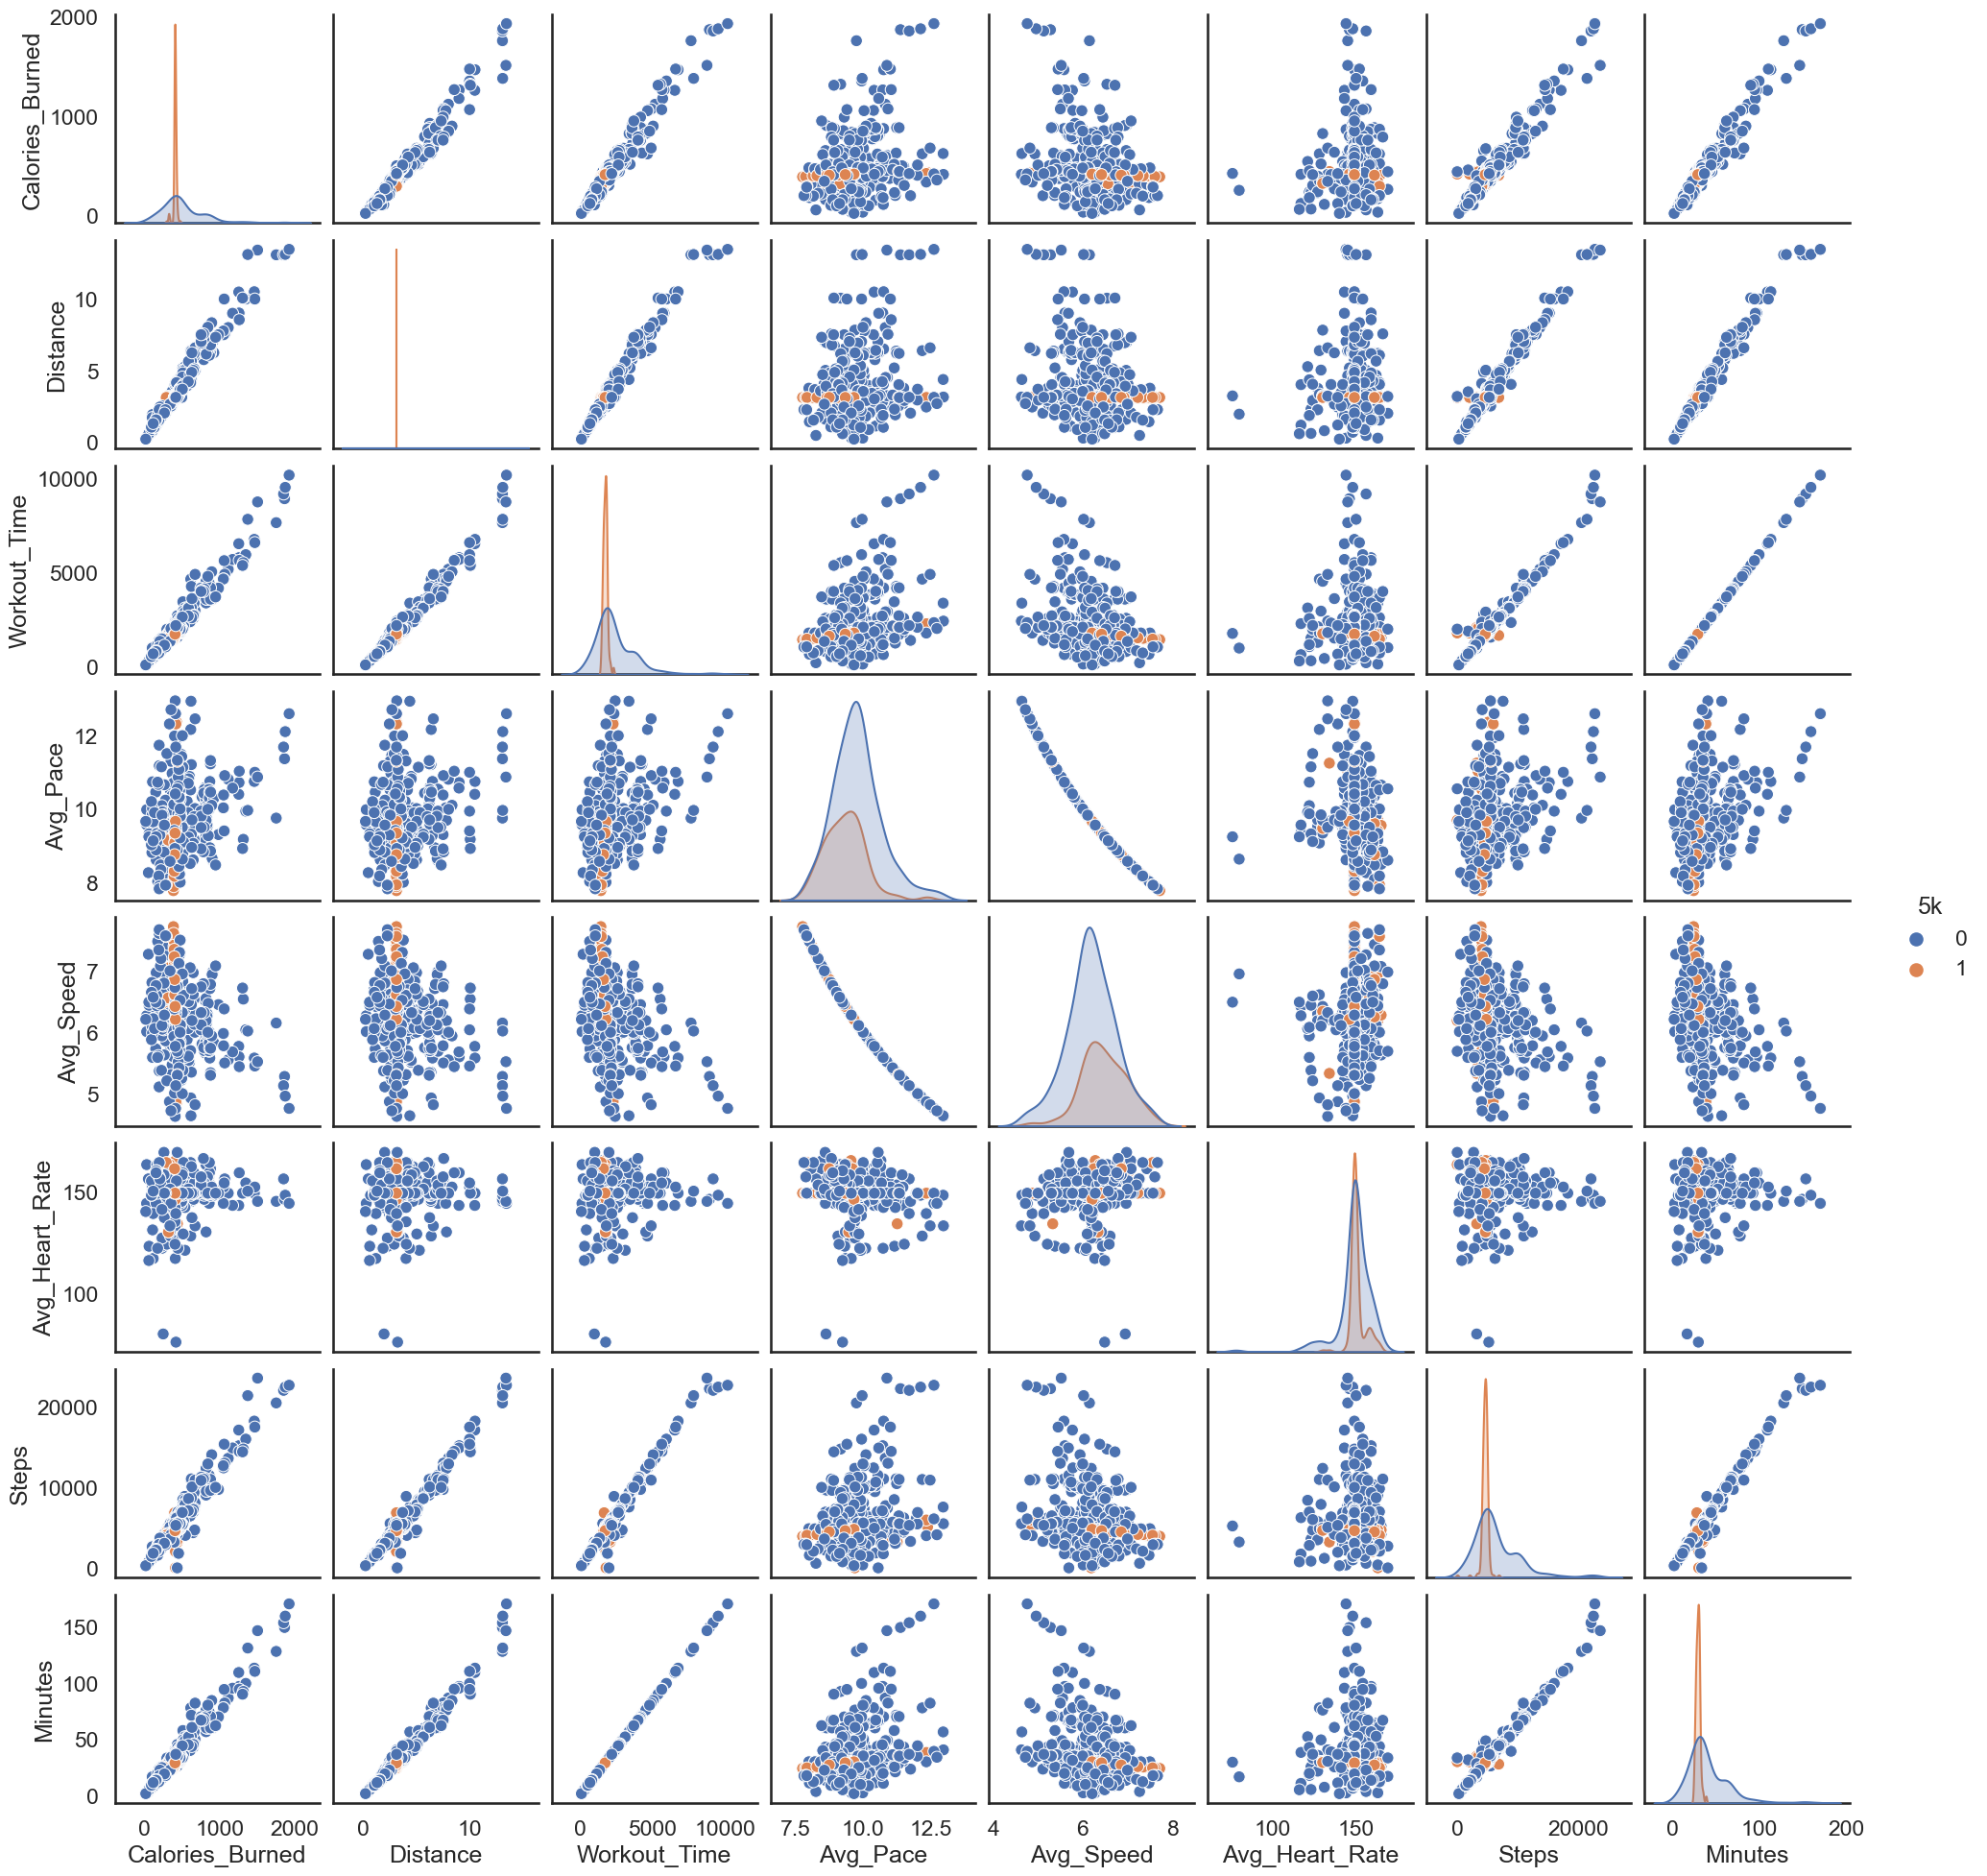

In [23]:
sns.pairplot(data, hue='5k')

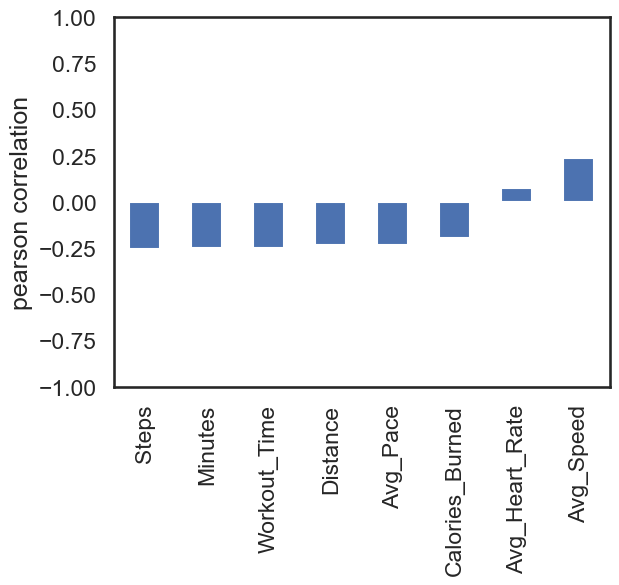

In [24]:
ax = correlations.plot(kind='bar')
ax.set(ylim=[-1, 1], ylabel='pearson correlation');

In [25]:
from sklearn.preprocessing import MinMaxScaler

fields = correlations.map(abs).sort_values().iloc[-2:].index
print(fields)
X = data[fields]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=['%s_scaled' % fld for fld in fields])
print(X.columns)

Index(['Minutes', 'Steps'], dtype='object')
Index(['Minutes_scaled', 'Steps_scaled'], dtype='object')


### Part 2: Linear Decision Boundary

Our goal is to look at the decision boundary of a LinearSVC classifier on this dataset. Check out [this example](https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork31576874-2022-01-01#sphx-glr-auto-examples-svm-plot-iris-svc-py) in sklearn's documentation.

*   Fit a Linear Support Vector Machine Classifier to `X`, `y`.
*   Pick 300 samples from `X`. Get the corresponding `y` value. Store them in variables `X_color` and `y_color`. This is because original dataset is too large and it produces a crowded plot.
*   Modify `y_color` so that it has the value "red" instead of 1 and 'yellow' instead of 0.
*   Scatter plot X_color's columns. Use the keyword argument "color=y_color" to color code samples.
*   Use the code snippet below to plot the decision surface in a color coded way.

```python
x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = *[YOUR MODEL]*.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap=colors, alpha=.3)
```

With LinearSVC, it is easy to experiment with different parameter choices and see the decision boundary.


In [26]:
from sklearn.kernel_approximation import Nystroem
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

y = data['5k'] == 1
X = data[data.columns[:-1]]

kwargs = {'kernel': 'rbf'}
svc = SVC(**kwargs)
nystroem = Nystroem(**kwargs)
sgd = SGDClassifier()

In [27]:
%%timeit
svc.fit(X, y)

5.32 ms ± 386 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [28]:
%%timeit
X_transformed = nystroem.fit_transform(X)
sgd.fit(X_transformed, y)

9.83 ms ± 399 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [29]:
X2 = pd.concat([X]*5)
y2 = pd.concat([y]*5)

print(X2.shape)
print(y2.shape)

(2565, 8)
(2565,)


In [30]:
%timeit svc.fit(X2, y2)

116 ms ± 1.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [31]:
%%timeit
X2_transformed = nystroem.fit_transform(X2)
sgd.fit(X2_transformed, y2)

31.1 ms ± 5.94 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Stratified Shuffle Split

*   Use `StratifiedShuffleSplit` to split data into train and test sets that are stratified by wine quality. If possible, preserve the indices of the split for question 5 below.
*   Check the percent composition of each quality level for both the train and test data sets.


In [32]:
# All data columns except for 5k
feature_cols = [x for x in data.columns if x not in '5k']

In [33]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

In [34]:
dt.tree_.node_count, dt.tree_.max_depth

(5, 2)

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

The decision tree predicts a little better on the training data than the test data, which is consistent with (mild)  overfitting. Also notice the perfect recall score for the training data. In many instances, this prediction difference is even greater than that seen here.


In [36]:
# The error on the training and test data sets
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error
### END SOLUTION

,train,test
accuracy,1.0,1.0
precision,1.0,1.0
recall,1.0,1.0
f1,1.0,1.0


### Section 4

*   Using grid search with cross validation, find a decision tree that performs well on the test data set. Use a different variable name for this decision tree model than in question 3 so that both can be used in question 6.
*   Determine the number of nodes and the depth of this tree.
*   Measure the errors on the training and test sets as before and compare them to those from the tree in question 3.


In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(X_train, y_train)

In [38]:
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(3, 1)

In [39]:
y_train_pred_gr = GR.predict(X_train)
y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([measure_error(y_train, y_train_pred_gr, 'train'),
                                 measure_error(y_test, y_test_pred_gr, 'test')],
                                axis=1)

In [40]:
train_test_gr_error

,train,test
accuracy,0.775610,0.844660
precision,0.574074,0.659574
recall,1.000000,1.000000
f1,0.729412,0.794872


In [41]:
data1 = data.reset_index()

In [42]:
# feature_cols = [x for x in data1.columns if x != '5k']

# # Create the data sets
# X_train = data1.loc[train_idx, feature_cols]
# y_train = data1.loc[train_idx, '5k']

# X_test = data1.loc[test_idx, feature_cols]
# y_test = data1.loc[test_idx, '5k']

In [43]:
from sklearn.tree import DecisionTreeRegressor

dr = DecisionTreeRegressor().fit(X_train, y_train)

param_grid = {'max_depth':range(1, dr.tree_.max_depth+1, 2),
              'max_features': range(1, len(dr.feature_importances_)+1)}

GR_sugar = GridSearchCV(DecisionTreeRegressor(random_state=42),
                     param_grid=param_grid,
                     scoring='neg_mean_squared_error',
                      n_jobs=-1)

GR_sugar = GR_sugar.fit(X_train, y_train)

In [44]:
GR_sugar.best_estimator_.tree_.node_count, GR_sugar.best_estimator_.tree_.max_depth

(3, 1)

In [45]:
from sklearn.metrics import mean_squared_error

y_train_pred_gr_sugar = GR_sugar.predict(X_train)
y_test_pred_gr_sugar  = GR_sugar.predict(X_test)

train_test_gr_sugar_error = pd.Series({'train': mean_squared_error(y_train, y_train_pred_gr_sugar),
                                         'test':  mean_squared_error(y_test, y_test_pred_gr_sugar)},
                                          name='MSE').to_frame().T

train_test_gr_sugar_error

,train,test
MSE,0.128817,0.105794


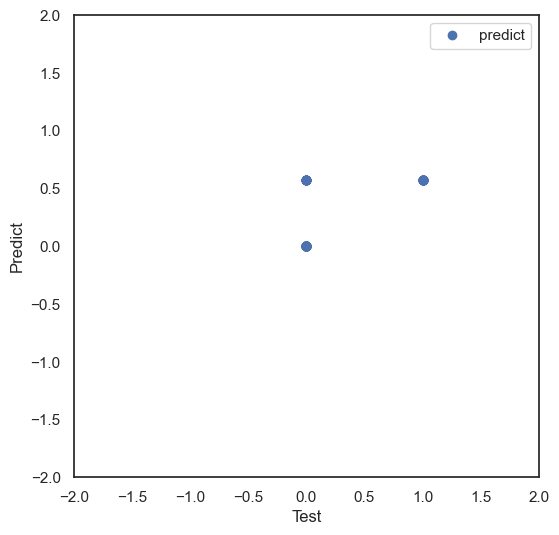

In [46]:
sns.set_context('notebook')
sns.set_style('white')
fig = plt.figure(figsize=(6,6))
ax = plt.axes()

ph_test_predict = pd.DataFrame({'test':y_test.values,
                                'predict': y_test_pred_gr_sugar}).set_index('test').sort_index()

ph_test_predict.plot(marker='o', ls='', ax=ax)
ax.set(xlabel='Test', ylabel='Predict', xlim=(-2,2), ylim=(-2,2));
### END SOLUTION

### Plot DTM

This question requires an additional command line program (GraphViz) and Python library (PyDotPlus). GraphViz can be installed with a package manager on Linux and Mac. For PyDotPlus, either `pip` or `conda` (`conda install -c conda-forge pydotplus`) can be used to install the library.

Once these programs are installed:

*   Create a visualization of the decision tree from question 3, where wine color was predicted and the number of features and/or splits are not limited.
*   Create a visualization of the decision tree from question 4, where wine color was predicted but a grid search was used to find the optimal depth and number of features.

The decision tree from question 5 will likely have too many nodes to visualize.


In [47]:
%pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [48]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
#%pip install pydotplus
import pydotplus

In [49]:
# # Create an output destination for the file
# dot_data = StringIO()

# export_graphviz(dt, out_file=dot_data, filled=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# # View the tree image
# filename = r'C:\Users\coleb\OneDrive\Coraline\MapMyRunProjects\Elements\wine_tree.png'
# #graph.write_png(filename)
# Image(filename=filename) 

In [50]:
%pip install graphviz
%pip install pydotplus
from sklearn.tree import export_graphviz

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [51]:
# # Create an output destination for the file
# dot_data = StringIO()

# export_graphviz(GR.best_estimator_, out_file=dot_data, filled=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# # View the tree image
# filename = r'C:\Users\coleb\OneDrive\Coraline\MapMyRunProjects\Elements\wine_tree_prune.png'
# graph.write_png('wine_tree_prune|')
# Image(filename=filename) 
# ### END SOLUTION

In [52]:
def get_accuracy(X_train, X_test, y_train, y_test, model):
    return  {"test Accuracy":metrics.accuracy_score(y_test, model.predict(X_test)),"trian Accuracy": metrics.accuracy_score(y_train, model.predict(X_train))}

In [53]:

def get_correlation(X_test, y_test,models):
    #This function calculates the average correlation between predictors  
    n_estimators=len(models.estimators_)
    prediction=np.zeros((y_test.shape[0],n_estimators))
    predictions=pd.DataFrame({'estimator '+str(n+1):[] for n in range(n_estimators)})
    
    for key,model in zip(predictions.keys(),models.estimators_):
        predictions[key]=model.predict(X_test.to_numpy())
    
    corr=predictions.corr()
    print("Average correlation between predictors: ", corr.mean().mean()-1/n_estimators)
    return corr


In [54]:
from sklearn.utils import resample

In [55]:
for n in range(5):

    print(resample(data1[0:-1]))

     index  Calories_Burned  Distance  Workout_Time  Avg_Pace  Avg_Speed  \
333    400            439.0      4.00        2715.0     11.31       5.31   
344    411            326.0      3.22        1807.0      9.34       6.42   
87     107            328.0      2.43        1356.0      9.31       6.45   
20      21            872.0      6.50        4195.0     10.75       5.58   
24      26            415.0      3.11        1892.0     10.14       5.91   
..     ...              ...       ...           ...       ...        ...   
260    310            260.0      2.00        1065.0      8.88       6.76   
474    575            451.0      3.22        2100.0     10.87       5.52   
120    141            824.0      6.20        3548.0      9.54       6.29   
17      18            354.0      2.89        1744.0     10.06       5.97   
190    215            456.0      3.56        2072.0      9.70       6.19   

     Avg_Heart_Rate    Steps  Minutes  5k  
333           151.0   6478.0    45.25   0  

In [56]:
X=data1[['Calories_Burned', 'Distance', 'Workout_Time', 'Avg_Pace', 'Avg_Speed', 'Avg_Heart_Rate', 'Steps', 'Minutes']]

In [57]:
M=X.shape[1]
M

8

In [58]:
m=3

In [59]:
feature_index= range(M)
feature_index

range(0, 8)

In [60]:
import random
random.sample(feature_index,m)

[6, 5, 4]

In [61]:
for n in range(5):

    print("sample {}".format(n))
    print(resample(X[0:5]).iloc[:,random.sample(feature_index,m)])

sample 0
   Distance  Avg_Pace    Steps
1      6.21     10.34  10072.0
1      6.21     10.34  10072.0
3      3.10      9.70   4660.0
3      3.10      9.70   4660.0
4      3.10      8.91   4439.0
sample 1
     Steps  Workout_Time  Distance
3   4660.0        1804.0      3.10
1  10072.0        3854.0      6.21
2  10292.0        3884.0      6.26
1  10072.0        3854.0      6.21
2  10292.0        3884.0      6.26
sample 2
     Steps  Avg_Speed  Calories_Burned
1  10072.0       5.80            762.0
4   4439.0       6.73            403.0
0   3227.0       5.33            440.0
4   4439.0       6.73            403.0
2  10292.0       5.81            769.0
sample 3
   Calories_Burned  Avg_Speed  Minutes
4            403.0       6.73    27.63
4            403.0       6.73    27.63
0            440.0       5.33    34.88
0            440.0       5.33    34.88
1            762.0       5.80    64.23
sample 4
   Avg_Heart_Rate    Steps  Minutes
0           134.0   3227.0    34.88
2           147.0  

In [62]:
y = data1['5k']
y.head()

0    1
1    0
2    0
3    1
4    1
Name: 5k, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1)
print ('Train set', X_train.shape,  y_train.shape)
print ('Test set', X_test.shape,  y_test.shape)

Train set (359, 8) (359,)
Test set (154, 8) (154,)


In [64]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [65]:
n_estimators=20
Bag= BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion="entropy", max_depth = 4,random_state=2),n_estimators=n_estimators,random_state=0,bootstrap=True)

In [66]:
Bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=4,
                                                        random_state=2),
                  n_estimators=20, random_state=0)

In [67]:
Bag.predict(X_test).shape

(154,)

In [68]:
print(get_accuracy(X_train, X_test, y_train, y_test,  Bag))

{'test Accuracy': 1.0, 'trian Accuracy': 1.0}


In [69]:
get_correlation(X_test, y_test,Bag).style.background_gradient(cmap='coolwarm')


Average correlation between predictors:  0.95


,estimator 1,estimator 2,estimator 3,estimator 4,estimator 5,estimator 6,estimator 7,estimator 8,estimator 9,estimator 10,estimator 11,estimator 12,estimator 13,estimator 14,estimator 15,estimator 16,estimator 17,estimator 18,estimator 19,estimator 20
estimator 1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
estimator 2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
estimator 3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
estimator 4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
estimator 5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
estimator 6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
estimator 7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
estimator 8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
estimator 9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
estimator 10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
n_estimators=20

In [72]:
M_features=X.shape[1]

In [73]:
max_features=round(np.sqrt(M_features))-1
max_features

2

In [74]:
model = RandomForestClassifier( max_features=max_features,n_estimators=n_estimators, random_state=0)

In [75]:
model.fit(X_train,y_train)

RandomForestClassifier(max_features=2, n_estimators=20, random_state=0)

In [76]:
print(get_accuracy(X_train, X_test, y_train, y_test, model))

{'test Accuracy': 0.9805194805194806, 'trian Accuracy': 1.0}


In [77]:
get_correlation(X_test, y_test,model).style.background_gradient(cmap='coolwarm')

Average correlation between predictors:  0.7343434784024679


,estimator 1,estimator 2,estimator 3,estimator 4,estimator 5,estimator 6,estimator 7,estimator 8,estimator 9,estimator 10,estimator 11,estimator 12,estimator 13,estimator 14,estimator 15,estimator 16,estimator 17,estimator 18,estimator 19,estimator 20
estimator 1,1.000000,0.711340,0.714057,0.690955,0.763075,0.831521,0.763075,0.717431,0.783431,0.676606,0.706660,0.774204,0.859736,0.734949,0.653450,0.845445,0.843017,0.743711,0.743711,0.739041
estimator 2,0.711340,1.000000,0.869541,0.812835,0.692237,0.831690,0.887365,0.679035,0.781240,0.738754,0.769678,0.805979,0.826667,0.762468,0.624177,0.813144,0.808255,0.774603,0.743228,0.863409
estimator 3,0.714057,0.869541,1.000000,0.887437,0.727782,0.862422,0.920027,0.714057,0.781944,0.737335,0.798269,0.804909,0.858811,0.795560,0.623585,0.876243,0.873196,0.804909,0.743086,0.862422
estimator 4,0.690955,0.812835,0.887437,1.000000,0.771445,0.754560,0.839371,0.657218,0.666806,0.697899,0.730193,0.763837,0.779292,0.745769,0.580945,0.800081,0.825904,0.731070,0.665538,0.754560
estimator 5,0.763075,0.692237,0.727782,0.771445,1.000000,0.753660,0.745455,0.668255,0.704557,0.782312,0.691546,0.758655,0.812059,0.749248,0.608540,0.798201,0.731468,0.697261,0.758655,0.691594
estimator 6,0.831521,0.831690,0.862422,0.754560,0.753660,1.000000,0.908825,0.739041,0.893561,0.751894,0.810912,0.850750,0.939208,0.816685,0.698018,0.954449,0.862348,0.850750,0.790871,0.848664
estimator 7,0.763075,0.887365,0.920027,0.839371,0.745455,0.908825,1.000000,0.731468,0.798201,0.721802,0.842822,0.820049,0.906276,0.749248,0.668537,0.923059,0.921108,0.850746,0.789352,0.908825
estimator 8,0.717431,0.679035,0.714057,0.657218,0.668255,0.739041,0.731468,1.000000,0.690410,0.736714,0.676606,0.682725,0.797342,0.703752,0.653450,0.783431,0.717431,0.835190,0.743711,0.677388
estimator 9,0.783431,0.781240,0.781944,0.666806,0.704557,0.893561,0.798201,0.690410,1.000000,0.736826,0.707145,0.775160,0.892284,0.799855,0.624323,0.877510,0.783431,0.745045,0.745045,0.771783
estimator 10,0.676606,0.738754,0.737335,0.697899,0.782312,0.751894,0.721802,0.736714,0.736826,1.000000,0.769849,0.782040,0.781476,0.751613,0.658109,0.766507,0.676606,0.752851,0.811229,0.692877


In [78]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (410, 8) (410,)
Test set: (103, 8) (103,)


In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
model = RandomForestClassifier()
model.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [81]:
param_grid = {'n_estimators': [2*n+1 for n in range(20)],
             'max_depth' : [2*n+1 for n in range(10) ],
             'max_features':["auto", "sqrt", "log2"]}


In [82]:
search = GridSearchCV(estimator=model, param_grid=param_grid,scoring='accuracy')
search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27, 29, 31, 33, 35, 37, 39]},
             scoring='accuracy')

In [83]:
search.best_score_

1.0

In [84]:
search.best_params_

{'max_depth': 7, 'max_features': 'log2', 'n_estimators': 39}

In [85]:

print(get_accuracy(X_train, X_test, y_train, y_test, search.best_estimator_))

{'test Accuracy': 1.0, 'trian Accuracy': 1.0}


In [86]:
data.head()

,Calories_Burned,Distance,Workout_Time,Avg_Pace,Avg_Speed,Avg_Heart_Rate,Steps,Minutes,5k
0,440.0,3.10,2093.0,11.25,5.33,134.0,3227.0,34.88,1
1,762.0,6.21,3854.0,10.34,5.80,153.0,10072.0,64.23,0
2,769.0,6.26,3884.0,10.33,5.81,147.0,10292.0,64.73,0
3,415.0,3.10,1804.0,9.70,6.19,150.0,4660.0,30.07,1
4,403.0,3.10,1658.0,8.91,6.73,145.0,4439.0,27.63,1


In [87]:
# Mask to select float columns
float_columns = (data.dtypes == np.float)

# Verify that the maximum of all float columns is 1.0
print( (data.loc[:,float_columns].max()==1.0).all() )

# Verify that the minimum of all float columns is -1.0
print( (data.loc[:,float_columns].min()==-1.0).all() )

False
False


In [88]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['Distance'] = le.fit_transform(data['Distance'])

le.classes_

array([ 0.18,  0.25,  0.44,  0.56,  0.58,  0.66,  0.77,  0.85,  1.  ,
        1.01,  1.02,  1.04,  1.1 ,  1.16,  1.17,  1.27,  1.37,  1.4 ,
        1.51,  1.52,  1.53,  1.57,  1.68,  1.69,  1.71,  1.78,  1.81,
        1.84,  1.88,  1.9 ,  1.93,  1.99,  2.  ,  2.01,  2.02,  2.06,
        2.17,  2.2 ,  2.23,  2.24,  2.25,  2.27,  2.28,  2.33,  2.34,
        2.35,  2.37,  2.38,  2.43,  2.44,  2.47,  2.48,  2.5 ,  2.51,
        2.56,  2.58,  2.59,  2.6 ,  2.62,  2.63,  2.66,  2.67,  2.68,
        2.79,  2.8 ,  2.82,  2.83,  2.85,  2.89,  2.92,  2.99,  3.  ,
        3.01,  3.09,  3.1 ,  3.11,  3.12,  3.13,  3.14,  3.15,  3.16,
        3.17,  3.18,  3.19,  3.2 ,  3.21,  3.22,  3.23,  3.26,  3.27,
        3.29,  3.31,  3.33,  3.34,  3.35,  3.36,  3.38,  3.39,  3.4 ,
        3.43,  3.46,  3.47,  3.48,  3.49,  3.5 ,  3.51,  3.52,  3.54,
        3.56,  3.57,  3.58,  3.61,  3.62,  3.63,  3.64,  3.65,  3.66,
        3.68,  3.73,  3.74,  3.75,  3.76,  3.85,  3.89,  3.92,  4.  ,
        4.01,  4.02,

In [89]:
from sklearn.model_selection import train_test_split

# Alternatively, we could stratify the categories in the split, as was done previously
feature_columns = [x for x in data.columns if x != 'Distance']

X_train, X_test, y_train, y_test = train_test_split(data[feature_columns], data['Distance'],
                 test_size=0.3, random_state=42)


In [90]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((359, 8), (359,), (154, 8), (154,))

In [91]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

error_list = list()

# Iterate through various possibilities for number of trees
tree_list = [15, 25, 50, 100, 200, 400]
for n_trees in tree_list:
    
    # Initialize the gradient boost classifier
    GBC = GradientBoostingClassifier(n_estimators=n_trees, random_state=42)

    # Fit the model
    print(f'Fitting model with {n_trees} trees')
    GBC.fit(X_train.values, y_train.values)
    y_pred = GBC.predict(X_test)

    # Get the error
    error = 1.0 - accuracy_score(y_test, y_pred)
    
    # Store it
    error_list.append(pd.Series({'n_trees': n_trees, 'error': error}))

error_df = pd.concat(error_list, axis=1).T.set_index('n_trees')

error_df

Fitting model with 15 trees
Fitting model with 25 trees
Fitting model with 50 trees
Fitting model with 100 trees
Fitting model with 200 trees
Fitting model with 400 trees


,error
n_trees,
15.0,0.675325
25.0,0.675325
50.0,0.662338
100.0,0.629870
200.0,0.629870
400.0,0.636364


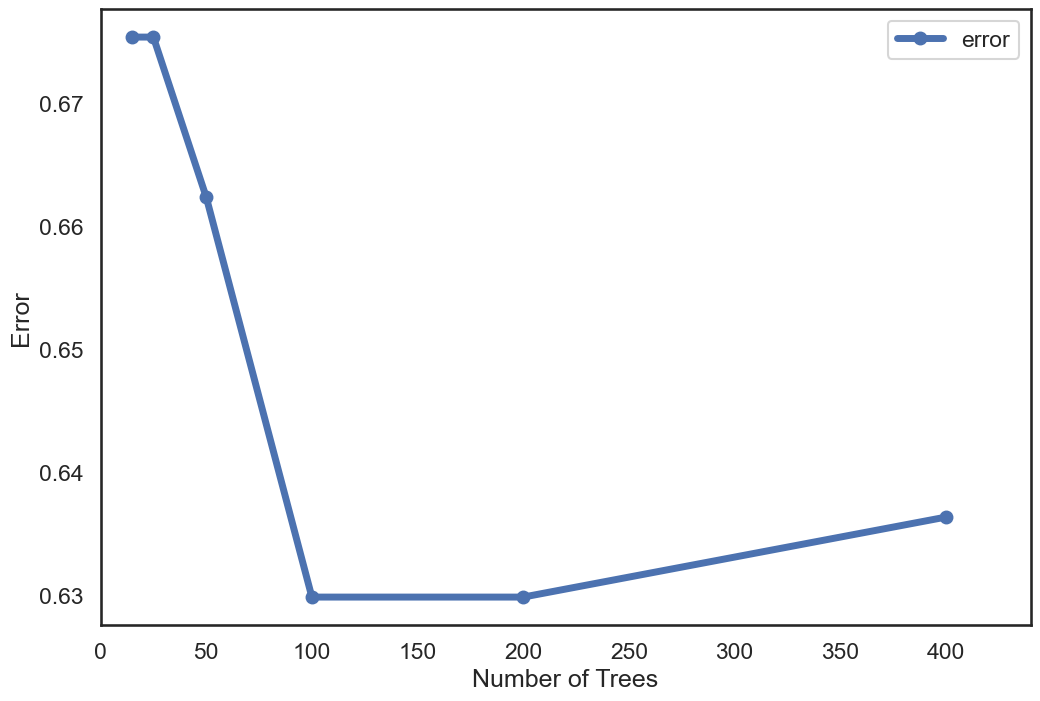

In [92]:
sns.set_context('talk')
sns.set_style('white')

# Create the plot
ax = error_df.plot(marker='o', figsize=(12, 8), linewidth=5)

# Set parameters
ax.set(xlabel='Number of Trees', ylabel='Error')
ax.set_xlim(0, max(error_df.index)*1.1);
### END SOLUTION

In [93]:
### BEGIN SOLUTION
from sklearn.model_selection import GridSearchCV

# The parameters to be fit
param_grid = {'n_estimators': tree_list,
              'learning_rate': [0.1, 0.01, 0.001, 0.0001],
              'subsample': [1.0, 0.5],
              'max_features': [1, 2, 3, 4]}

# The grid search object
GV_GBC = GridSearchCV(GradientBoostingClassifier(random_state=42), 
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

# Do the grid search
GV_GBC = GV_GBC.fit(X_train, y_train)

In [ ]:
# The best model
GV_GBC.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [ ]:
from sklearn.metrics import classification_report

y_pred = GV_GBC.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         0
          21       0.00      0.00      0.00         0
          26       0.00      0.00      0.00         0
          28       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          30       0.00    

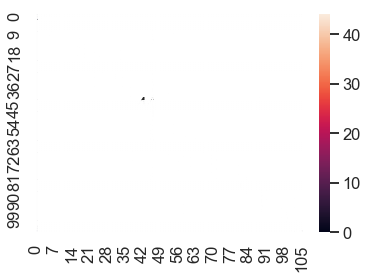

In [ ]:
from sklearn.metrics import confusion_matrix

sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
### BEGIN SOLUTION
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ABC = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))

param_grid = {'n_estimators': [100, 150, 200],
              'learning_rate': [0.01, 0.001]}

GV_ABC = GridSearchCV(ABC,
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

GV_ABC = GV_ABC.fit(X_train, y_train)

In [ ]:
# The best model
GV_ABC.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.01, n_estimators=150)

In [ ]:
y_pred = GV_ABC.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           5       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         0
          21       0.00      0.00      0.00         0
          26       0.00      0.00      0.00         0
          30       0.00      0.00      0.00         0
          32       0.00      0.00      0.00         0
          33       0.00      0.00      0.00         0
          34       0.00      0.00      0.00         0
          39       0.00      0.00      0.00         0
          40       0.00      0.00      0.00         0
          41       0.00      0.00      0.00         0
          42       0.00      0.00      0.00         0
          48       0.00    

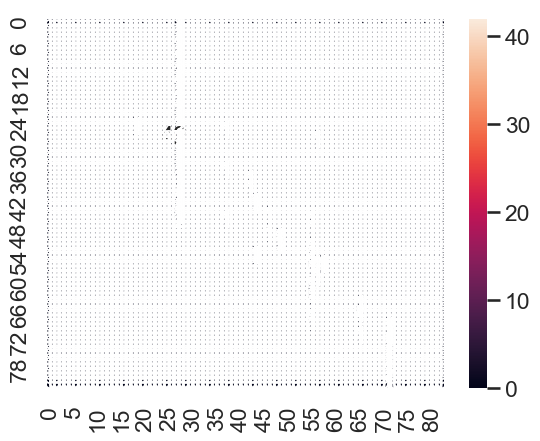

In [ ]:
sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
### BEGIN SOLUTION
from sklearn.linear_model import LogisticRegression

# L2 regularized logistic regression
LR_L2 = LogisticRegression(penalty='l2', max_iter=500, solver='saga').fit(X_train, y_train)

In [ ]:
y_pred = LR_L2.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           5       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         0
          21       0.00      0.00      0.00         0
          26       0.00      0.00      0.00         0
          30       0.00      0.00      0.00         0
          32       0.00      0.00      0.00         0
          33       0.00      0.00      0.00         0
          34       0.00      0.00      0.00         0
          39       0.00      0.00      0.00         0
          40       0.00      0.00      0.00         0
          41       0.00      0.00      0.00         0
          42       0.00      0.00      0.00         0
          48       0.00    

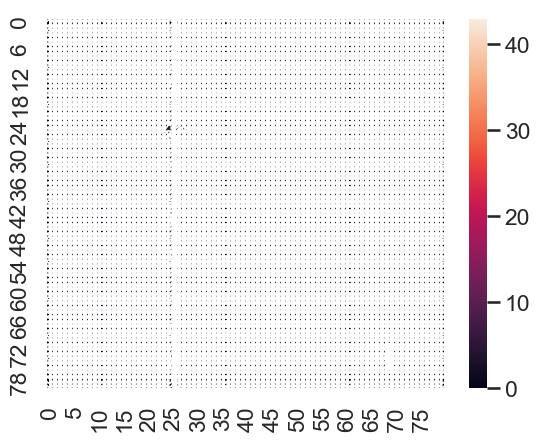

In [ ]:
sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
from sklearn.ensemble import VotingClassifier

# The combined model--logistic regression and gradient boosted trees
estimators = [('LR_L2', LR_L2), ('GBC', GV_GBC)]

# Though it wasn't done here, it is often desirable to train 
# this model using an additional hold-out data set and/or with cross validation
VC = VotingClassifier(estimators, voting='soft')
VC = VC.fit(X_train, y_train)

In [ ]:
y_pred = VC.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         2
          21       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         0
          29       0.00      0.00      0.00         0
          30       0.00    

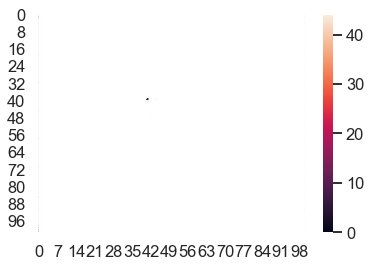

In [ ]:
sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d')
### END SOLUTION